## 2. PyCBC Tutorial: Visualization of Data and Signal Processing

We will be using the [PyCBC](http://github.com/ligo-cbc/pycbc) library, which is used to study gravitational-wave data, find astrophysical sources due to compact binary mergers, and study their parameters. These are some of the same tools that the LIGO and Virgo collaborations use to find gravitational waves in LIGO/Virgo data 

In this tutorial we will walk through how to visualize LIGO/Virgo data and how to perform some basic signal processing on it, including high/low passing, psd estimation, and whitening.

Additional [examples](http://pycbc.org/pycbc/latest/html/#library-examples-and-interactive-tutorials) and module level documentation are [here](http://pycbc.org/pycbc/latest/html/py-modindex.html)

#### Getting the software environment setup

PyCBC is installable through pip, but also relies on portions of the [LALSuite](git.ligo.org/lscsoft/lalsuite) c-library. A bundled version of this suitable for use with PyCBC is also available on Mac / Linux through pip. These can be installed as follows within the notebook.

In [ ]:
#@title
import sys
!{sys.executable} -m pip install pycbc ligo-common --no-cache-dir

     |████████████████████████████████| 6.7 MB 26.2 MB/s 
     |████████████████████████████████| 45 kB 42.9 MB/s 
     |████████████████████████████████| 45 kB 59.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 48.3 MB 1.4 MB/s 
     |████████████████████████████████| 51 kB 39.7 MB/s 
     |████████████████████████████████| 78 kB 73.6 MB/s 
     |████████████████████████████████| 1.4 MB 76.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 201 kB 84.6 MB/s 
     |████████████████████████████████| 7.3 MB 78.7 MB/s 
     |████████████████████████████████| 55 kB 61.5 MB/s 
     |████████████████████████████████| 295 kB 87.7 MB/s 
     |████████████████████████████████| 43 kB 48.9 MB/s 
  Installing build dependencies ... done
  Getting require

#### Viewing the raw LIGO data

Below we will view the raw ligo data. You should notice that there is signifant low frequency content (indicated by the large oscilations) and even some DC offset in the data.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
times = []
waves = []
wave_names = []
masses = []

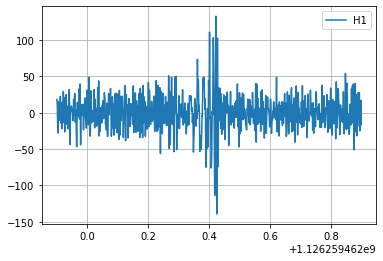

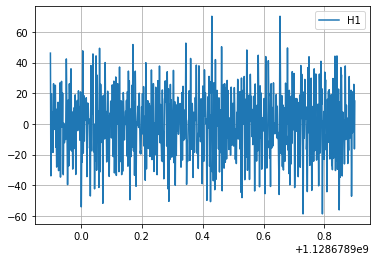

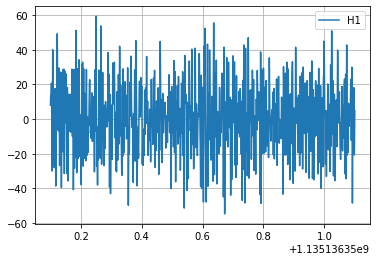

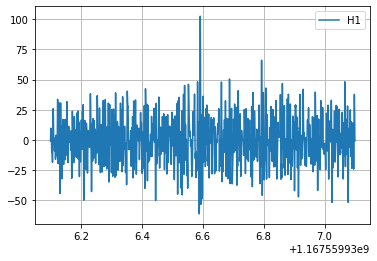

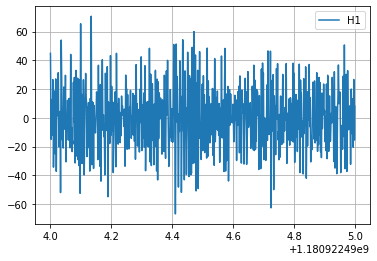

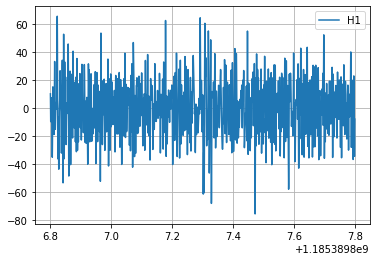

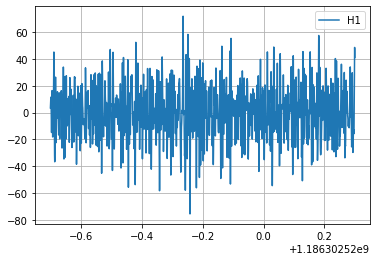

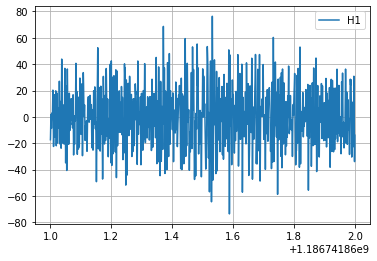

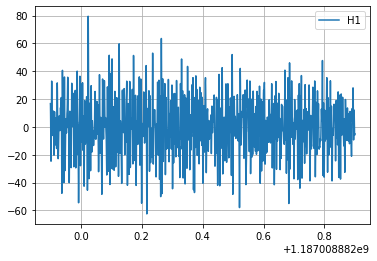

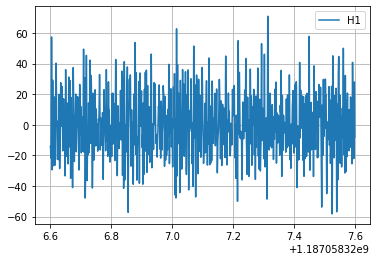

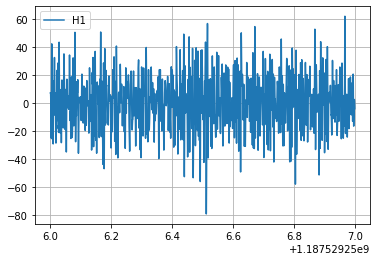

In [ ]:
%matplotlib inline

# Read in the data around GW150914
from pycbc.catalog import Merger
import pylab
from pycbc import catalog

### List the mergers in the catalog

for merger_name in catalog.Catalog():
    m = Merger(merger_name)

    # wave_names.append(merger_name[:-3])
    # masses.append([m.mass1, m.mass2])
    data = {}
    for ifo in ['H1']:
        data[ifo] = m.strain(ifo)
        whitened = {}

    for ifo in data:
        whitened[ifo] = data[ifo].whiten(4, 4)

    bpsd = whitened[ifo].highpass_fir(35, 512).lowpass_fir(350, 512)
    zoom = bpsd.time_slice(m.time - 0.1, m.time )

    max = np.max(zoom.data) if np.max(zoom.data) > np.min(zoom.data)*-1 else np.min(zoom.data)
    x = np.where(zoom.data == max)
    # z = bpsd.time_slice(zoom.sample_times.data[x]- 0.1, zoom.sample_times.data[x])
    z = zoom
    # print(len(z.data[1:]))
    # times.append(z.sample_times.data[1:])
    # waves.append(z.data[1:])
    pylab.plot(z.sample_times, z, label=ifo)
    pylab.grid()
    pylab.legend()
    pylab.show()

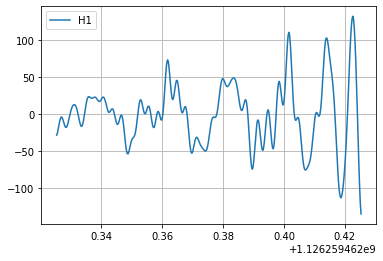

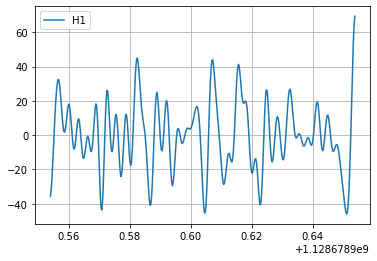

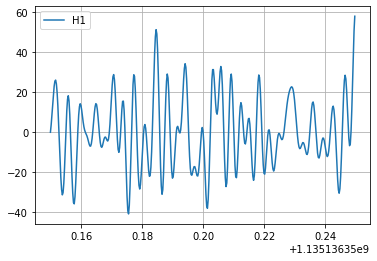

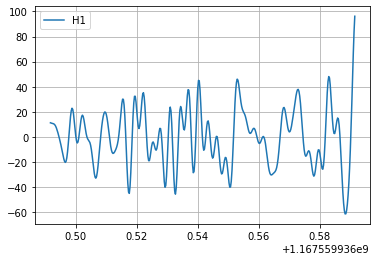

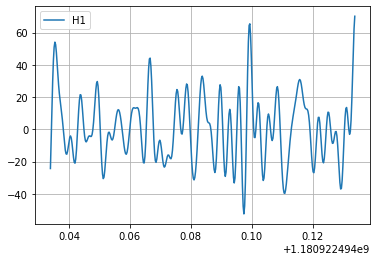

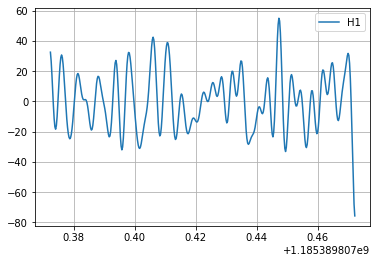

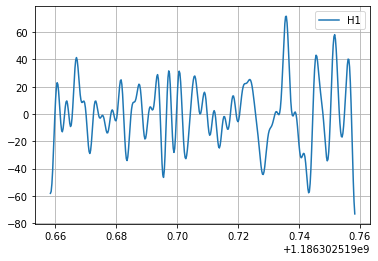

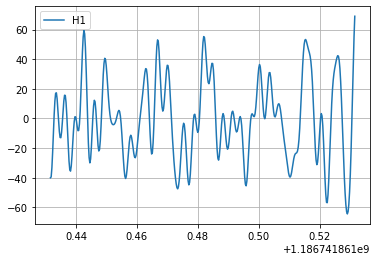

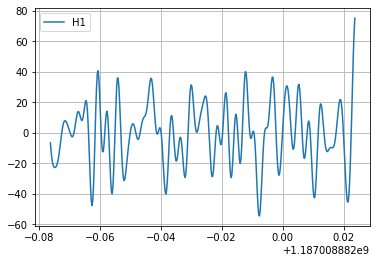

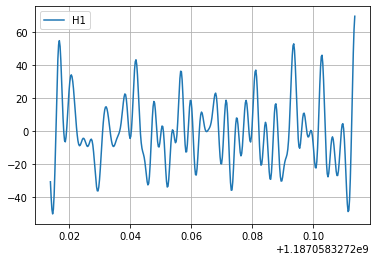

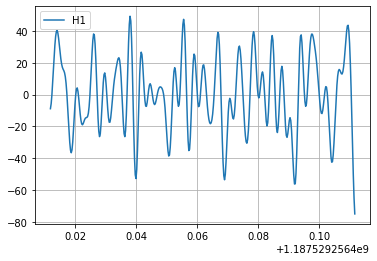

In [ ]:
%matplotlib inline

# Read in the data around GW150914
from pycbc.catalog import Merger
import pylab
from pycbc import catalog

### List the mergers in the catalog

for merger_name in catalog.Catalog():
    m = Merger(merger_name)

    # wave_names.append(merger_name[:-3])
    # masses.append([m.mass1, m.mass2])
    data = {}
    for ifo in ['H1']:
        data[ifo] = m.strain(ifo)
        whitened = {}

    for ifo in data:
        whitened[ifo] = data[ifo].whiten(4, 4)

    bpsd = whitened[ifo].highpass_fir(35, 512).lowpass_fir(350, 512)
    zoom = bpsd.time_slice(m.time - 0.5, m.time +0.5)

    max = np.max(zoom.data) if np.max(zoom.data) > np.min(zoom.data)*-1 else np.min(zoom.data)
    x = np.where(zoom.data == max)
    z = bpsd.time_slice(zoom.sample_times.data[x]- 0.1, zoom.sample_times.data[x])
    # z = zoom
    # print(len(z.data[1:]))
    # times.append(z.sample_times.data[1:])
    # waves.append(z.data[1:])
    pylab.plot(z.sample_times, z, label=ifo)
    pylab.grid()
    pylab.legend()
    pylab.show()


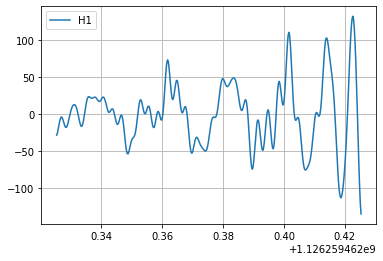

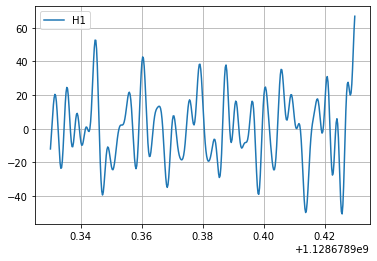

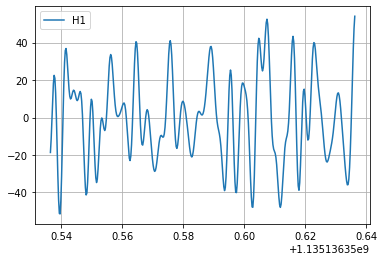

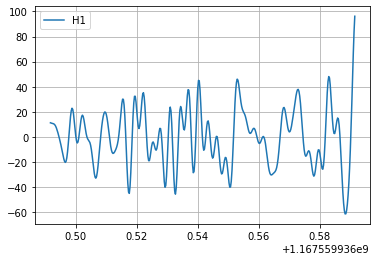

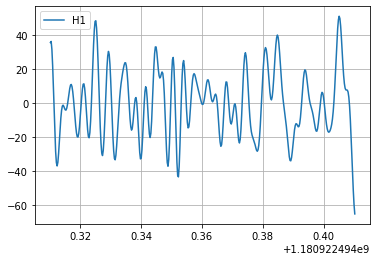

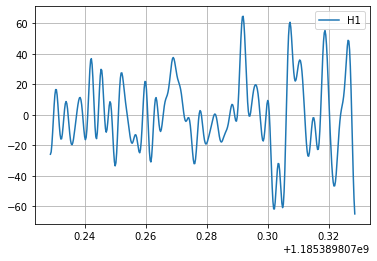

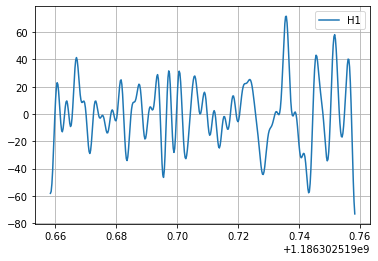

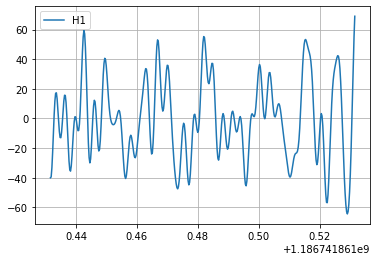

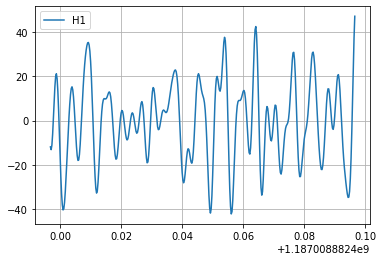

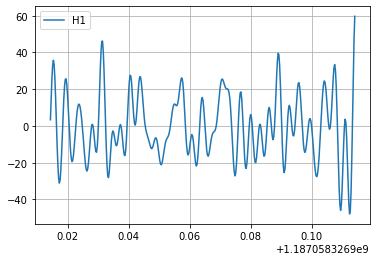

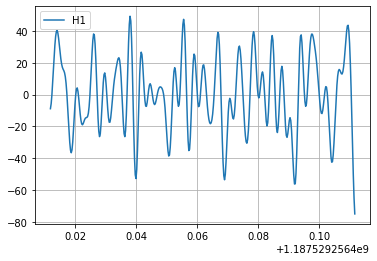

In [ ]:
%matplotlib inline

# Read in the data around GW150914
from pycbc.catalog import Merger
import pylab
from pycbc import catalog

### List the mergers in the catalog

for merger_name in catalog.Catalog():
    m = Merger(merger_name)

    # wave_names.append(merger_name[:-3])
    # masses.append([m.mass1, m.mass2])
    data = {}
    for ifo in ['H1']:
        data[ifo] = m.strain(ifo)
        whitened = {}

    for ifo in data:
        whitened[ifo] = data[ifo].whiten(4, 4)

    bpsd = whitened[ifo].highpass_fir(35, 512).lowpass_fir(350, 512)
    zoom = bpsd.time_slice(m.time - 0.1, m.time +0.1 )

    max = np.max(zoom.data) if np.max(zoom.data) > np.min(zoom.data)*-1 else np.min(zoom.data)
    x = np.where(zoom.data == max)
    z = bpsd.time_slice(zoom.sample_times.data[x]- 0.1, zoom.sample_times.data[x])
    # z = zoom
    # print(len(z.data[1:]))
    # times.append(z.sample_times.data[1:])
    # waves.append(z.data[1:])
    pylab.plot(z.sample_times, z, label=ifo)
    pylab.grid()
    pylab.legend()
    pylab.show()

In [ ]:
# df = pd.DataFrame({'wave': wave_names, 'time': times, 'ts': waves, 'masses': masses})

In [ ]:
# df['ts'] = df['ts'].apply(lambda x: np.array(x))

In [ ]:
# type(df['ts'].values)

numpy.ndarray

In [ ]:
# times[0]

In [ ]:
# df.to_parquet('ligo_data_filtered.parquet')

In [ ]:
# f = pd.read_parquet('round02_ligo_waves.parquet')

In [ ]:
# f

,wave,time,ts,masses
0,GW150914,"[1126259462.3256836, 1126259462.3259277, 11262...","[-29.128154645927, -24.169004838617536, -18.38...","[35.6, 30.6]"
1,GW151012,"[1128678900.3303223, 1128678900.3305664, 11286...","[-3.476412416479207, 3.5353082286320086, 10.36...","[23.2, 13.6]"
2,GW151226,"[1135136350.1501465, 1135136350.1503906, 11351...","[3.615903757453359, 8.448289574929195, 13.7401...","[13.7, 7.7]"
3,GW170104,"[1167559936.4919434, 1167559936.4921875, 11675...","[9.889769001902032, 9.761982114931378, 9.67198...","[30.8, 20.0]"
4,GW170608,"[1180922494.0341797, 1180922494.0344238, 11809...","[-7.478761054912954, 11.259398515279937, 28.29...","[11.0, 7.6]"
5,GW170729,"[1185389807.3725586, 1185389807.3728027, 11853...","[29.53278234291692, 20.82563056041123, 10.5438...","[50.2, 34.0]"
6,GW170809,"[1186302519.6586914, 1186302519.6589355, 11863...","[-57.65523687113897, -51.979860207642496, -42....","[35.0, 23.8]"
7,GW170814,"[1186741861.4318848, 1186741861.432129, 118674...","[-39.70364649899691, -33.43617175128396, -22.9...","[30.6, 25.2]"
8,GW170817,"[1187008881.9240723, 1187008881.9243164, 11870...","[-13.740933868668467, -18.219333116184497, -21...","[1.46, 1.27]"
9,GW170818,"[1187058327.2141113, 1187058327.2143555, 11870...","[-41.2808537897311, -48.51085557367809, -51.39...","[35.4, 26.7]"
